# Quantum Signal Processing

In [1]:
import numpy as np
from scipy.linalg import expm, sinm, cosm
import matplotlib.pyplot as plt

In [2]:
X_gate = np.array([[0, 1], [1, 0]], dtype = 'complex_')
Y_gate = np.array([[0, -1j], [1j, 0]], dtype = 'complex_')
Z_gate = np.array([[1, 0], [0, -1]], dtype = 'complex_')

def R_x(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]], dtype = 'complex_')

def R_y(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]], dtype = 'complex_')

def R_z(theta):
    return np.array([[np.exp(-1j*theta/2), 0], [0, np.exp(1j*theta/2)]], dtype = 'complex_')


In [3]:
def W(a):
    '''
    signal rotation operator
    '''
    return np.array([[a, 1j*np.sqrt(1-np.square(a)+0j)], [1j*np.sqrt(1-np.square(a)+0j), a]], dtype = 'complex_')

$$
W(a) = 
\begin{bmatrix}
a & i\sqrt{1-a^2} \\
i\sqrt{1-a^2} & a
\end{bmatrix}
$$

In [4]:
def S(phi):
    '''
    signal processing operator
    '''
    return expm(1j*phi*Z_gate)

$$ S(\phi) = e^{i \phi Z} $$

In [5]:
def QSP(phi_vec, a):
    '''
    input: vector of phis, a
    Performs the quantum signal processing 
    '''
    result = S(phi_vec[0])
    for k in range(1, len(phi_vec)):
        result = result @ (W(a) @ S(phi_vec[k]))
    return result

$$
U_{\vec{\phi}} = e^{i \phi_0 Z} \prod_{k=1}^d W(a) e^{i \phi_k Z}
=
\begin{bmatrix}
P(a) & i Q(a) \sqrt{1-a^1} \\
i Q^{*}(a) \sqrt{1-a^2} & P^{*}(a)
\end{bmatrix}
$$

## Trivial Example
$ \vec{\phi} = (0,0) $

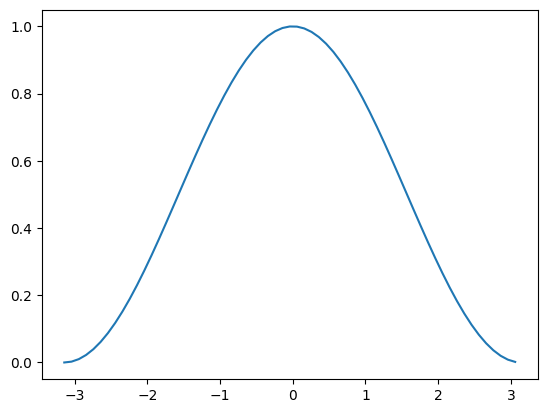

In [6]:
phi_vec_triv = [0, 0]

theta_vec_triv = np.arange(start=-np.pi, stop=np.pi, step=0.1)
a_vec_triv = [np.cos(-1/2*theta) for theta in theta_vec_triv]

transformation = [np.square(np.abs((QSP(phi_vec_triv, a)[0][0]))) for a in a_vec_triv]

plt.plot(theta_vec_triv, transformation)
plt.show()

## Example BB1
$ \vec{\phi} = (\pi/2, -\eta, 2\eta, 0, -2\eta, \eta) $ with $ \eta = \frac{1}{2} \cos^{-1}(-1/4) $

In [7]:
eta = 1/2 * np.arccos(-1/4)
phi_vec_bb1 = [np.pi/2, -eta, 2*eta, 0, -2*eta, eta]

$ \theta = -2 \cos^{-1}(a) \implies a = \cos(-\frac{1}{2} \theta) $

[1.4060247962454925e-32, 0.009332160519240016, 0.03682071830676384, 0.08098711449182519, 0.13951226906477004, 0.2094358672841509, 0.2874012573901216, 0.36991805420021684, 0.4536141952162044, 0.5354526777414226, 0.6128947343260552, 0.6839995516583429, 0.7474593773220323, 0.8025766305746486, 0.8491953828428096, 0.8876027100627635, 0.9184158712349003, 0.9424694342387276, 0.960713082527113, 0.9741267719284733, 0.9836559952095618, 0.9901667785471143, 0.9944180081581929, 0.9970477879410252, 0.9985705308897793, 0.9993820162016619, 0.9997703092603402, 0.9999309405166834, 0.9999849239601898, 0.9999980861093285, 0.9999999216978319, 0.9999999999494635, 0.9999999996126228, 0.9999998466664567, 0.9999971401252371, 0.9999799431584604, 0.9999138911459903, 0.9997252336178792, 0.9992817637708167, 0.9983735923948049, 0.9966955057803759, 0.9938324028454054, 0.9892492387772932, 0.9822871429383235, 0.9721679206082044, 0.958009815186227, 0.9388578763186167, 0.9137321537844234, 0.8816958601894325, 0.841943423

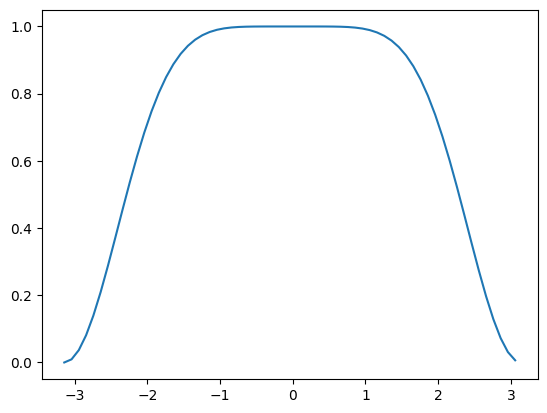

In [8]:
theta_vec_bb1 = np.arange(start=-np.pi, stop=np.pi, step=0.1)
a_vec_bb1 = [np.cos(-1/2*theta) for theta in theta_vec_bb1]

transformation = [np.square(np.abs(QSP(phi_vec_bb1, a)[0][0])) for a in a_vec_bb1]

def target(theta):
    return 1/8 * np.square(np.cos(theta/2)) * (3*np.power(np.cos(theta/2), 8) - 15*np.power(np.cos(theta/2), 6) + 35*np.power(np.cos(theta/2), 4) - 45*np.power(np.cos(theta/2), 2) + 30)

#transformation = [target(theta) for theta in theta_vec_bb1]

print(transformation)

plt.plot(theta_vec_bb1, transformation)
plt.show()

## Example The Eigenvalue Threshold Problem

#### Calculate the phase angles

[pyqsp.poly.PolyEfilter] degree=30, delta=0.3
[PolyTaylorSeries] max [0.94955034] is at [2.19000128e-08]: normalizing
[PolyTaylorSeries] average error = 0.009629178075583878 in the domain [-1, 1] using degree 30
[ 9.00000000e-01  0.00000000e+00 -7.03162032e+01  0.00000000e+00
  2.15396232e+03  0.00000000e+00 -3.51868887e+04  0.00000000e+00
  3.51546051e+05  0.00000000e+00 -2.32307892e+06  0.00000000e+00
  1.06630789e+07  0.00000000e+00 -3.50692967e+07  0.00000000e+00
  8.41828469e+07  0.00000000e+00 -1.48719205e+08  0.00000000e+00
  1.93076127e+08  0.00000000e+00 -1.81910631e+08  0.00000000e+00
  1.20962624e+08  0.00000000e+00 -5.38034514e+07  0.00000000e+00
  1.43618818e+07  0.00000000e+00 -1.73933896e+06]


c:\Python311\Lib\site-packages\scipy\interpolate\_polyint.py:502: UserWarning: 31 degrees provided, degrees higher than about thirty cause problems with numerical instability with 'KroghInterpolator'
  P = KroghInterpolator(xs, f(xs))


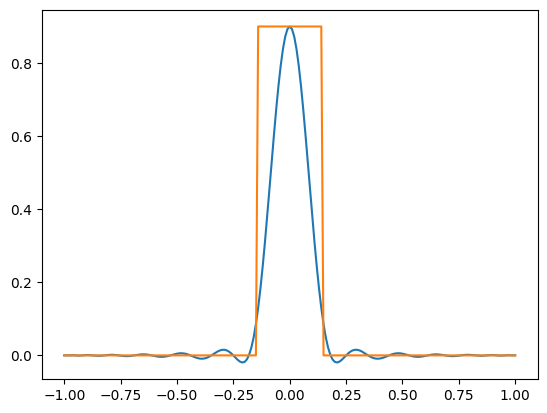

In [9]:
import pyqsp

pg = pyqsp.poly.PolyEigenstateFiltering()
thresh_pcoeffs, scale = pg.generate(30, 0.3, ensure_bounded=True, return_scale=True)
print(thresh_pcoeffs)
poly_filt = np.polynomial.Polynomial(thresh_pcoeffs)
poly_filt.degree()

a_list = np.linspace(-1, 1, 201)
plt.plot(a_list, poly_filt(a_list), label="polynomial")


def target_filt(x, delta, scale=1):
    """
    Target function for eigenvalue filtering.
    """
    return scale * (np.sign(x + 0.5*delta) - np.sign(x - 0.5*delta)) / 2

plt.plot(a_list, target_filt(a_list, 0.3, scale=0.9), label="target function")

Convert to Wx angle phases

In [10]:
from pyqsp.angle_sequence import QuantumSignalProcessingPhases

thresh_ang_seq = QuantumSignalProcessingPhases(thresh_pcoeffs, signal_operator="Wx")

[0.00019600806662461998, -5.976723286804653e-05, 0.00010567102818886953, 0.0005090677974264324, 0.0003729147591866322, -0.0001557940156745874, -0.0005497130631360314, -0.00048658854589195277, -2.2190229337581968e-05, 0.0005412980797849243, 0.000879434502346621, 0.0008137929514221987, 0.0003688570441157668, -0.0002696796901341947, -0.0008501493910803015, -0.0011553560396119211, -0.0010734321550533166, -0.0006235400286928178, 6.180847196257666e-05, 0.000784489860002513, 0.001340417408612793, 0.0015738716976741451, 0.0014140226968288316, 0.0008875971000020244, 0.00010798456223015673, -0.0007539509418691415, -0.0015091376508135634, -0.0019906059900111073, -0.0020868272695080403, -0.001762379406271497, -0.0010632045633181542, -0.00010673250800774525, 0.000940301060011639, 0.0018917419655548606, 0.0025741815872581397, 0.0028560692695099588, 0.0026693368786378235, 0.0020205538668864598, 0.0009903773668166471, -0.00027817236154489833, -0.0016005337487348947, -0.002777297827873726, -0.003622909

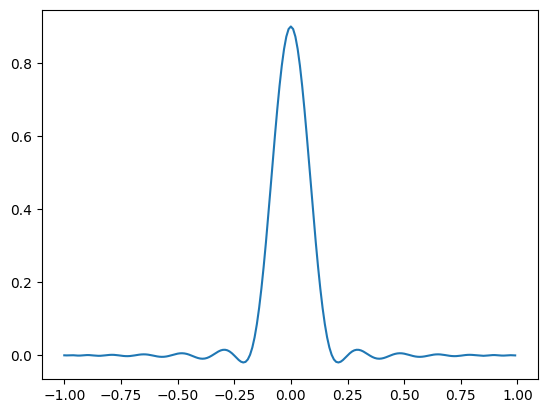

In [12]:
plus_state = np.array([[1], [-1]]) / np.sqrt(2)
a_vec_thresh = np.arange(start=-1, stop=1, step=0.01)

transformation = [(np.conj(plus_state).T @ QSP(thresh_ang_seq, a) @ plus_state)[0][0].real for a in a_vec_thresh]

print(transformation)
plt.plot(theta_vec_bb1, transformation)


## Example Hamiltonian Simulation

#### Sine

15.537708063830353
R=7
[PolySineTX] rescaling by 0.5.


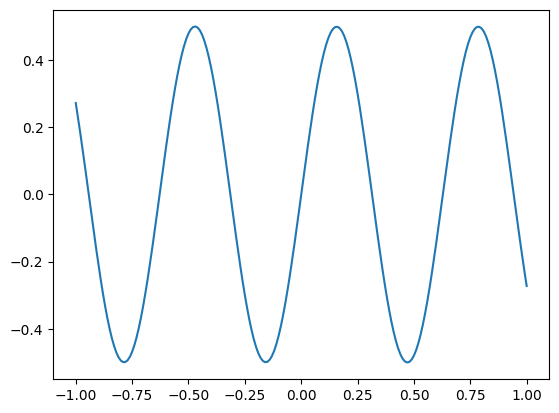

In [127]:
pg = pyqsp.poly.PolySineTX()
sin_pcoeffs, scale = pg.generate(10, 0.1, ensure_bounded=True, return_scale=True)
poly_filt = np.polynomial.Polynomial(sin_pcoeffs)
poly_filt.degree()

a_list = np.linspace(-1, 1, 201)
plt.plot(a_list, poly_filt(a_list), label="polynomial")

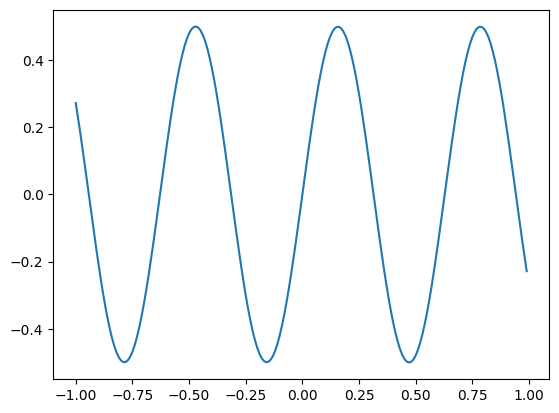

In [150]:
plus_state = np.array([[1], [1]]) / np.sqrt(2)

theta_vec_bb1 = np.arange(start=-1, stop=1, step=0.01)

transformation = [(np.conj(plus_state).T @ QSP(sin_pcoeffs, a) @ plus_state)[0][0] for a in theta_vec_bb1]

plt.plot(theta_vec_bb1, transformation)